# Feature Engineering
# Klassifikation
## Instanzbasierte Modelle
## Regelbasierte Modelle
## Mathematische Modelle
## Neuronale Netze
## Multiklass Klassifikatoren

In [2]:
## preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### Theorie

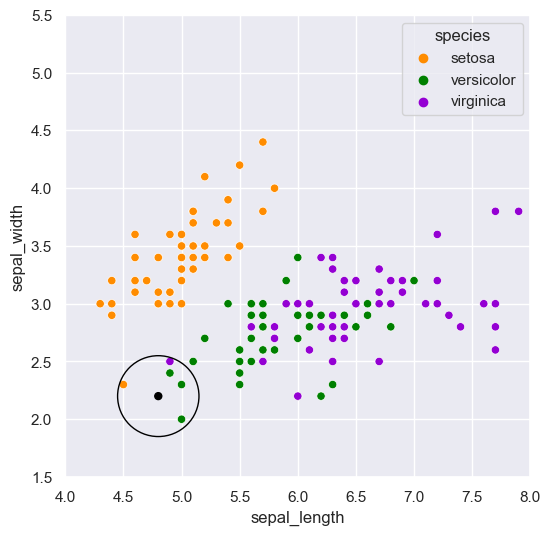

In [4]:
iris_data = sns.load_dataset('iris')

x_new = 4.8
y_new = 2.2
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x='sepal_length', 
                y='sepal_width', 
                data=iris_data,
                hue='species', 
                palette=['darkorange', 'green','darkviolet'])
ax.add_artist(plt.Circle((x_new, y_new), radius = 0.03, color='black', fill=True))
ax.add_artist(plt.Circle((x_new, y_new), radius = 0.35, color='black', fill=False))
plt.xlim(4, 8)
plt.ylim(1.5, 5.5);

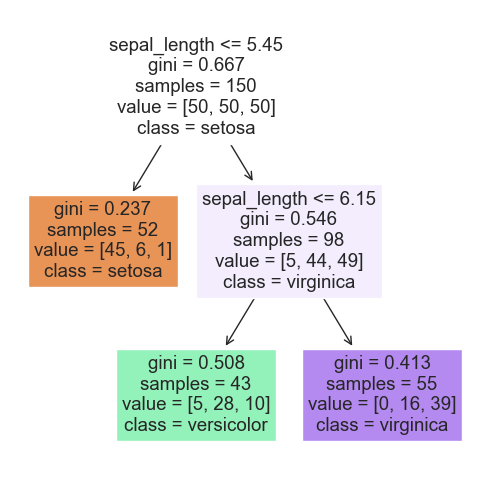

In [5]:
## decision tree
X_iris = iris_data.drop('species', axis=1)
y_iris = iris_data.species

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    min_impurity_decrease=0.05, 
    random_state=1234)
model.fit(X_iris[['sepal_length', 'sepal_width']], y_iris)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plot_tree(model,
          feature_names=X_iris.columns,
          class_names=model.classes_,
          filled=True); # Adds color accoding to class

### One-vs-Rest

In [7]:
## load data
data = sns.load_dataset('iris')

## features - target - split
X = data.drop('species', axis=1)
y = data.species

## train - test - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=2 / 3,
    random_state=1234)

## define and train model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
model = OneVsRestClassifier(LogisticRegression(random_state=1234)).fit(X_train, y_train)

## predictions
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

## results
print(pd.DataFrame(
    pred_proba,
    pred
).head(10))

                   0         1         2
versicolor  0.013719  0.632493  0.353788
versicolor  0.008730  0.613113  0.378157
virginica   0.000447  0.339444  0.660109
setosa      0.873231  0.126761  0.000008
versicolor  0.082540  0.789859  0.127601
setosa      0.809531  0.190458  0.000011
setosa      0.872715  0.127278  0.000007
setosa      0.842520  0.157477  0.000004
versicolor  0.051198  0.811919  0.136883
virginica   0.000016  0.376951  0.623033


### One-vs-One

In [9]:
## load data
data = sns.load_dataset('iris')

## features - target - split
X = data.drop('species', axis=1)
y = data.species

## train - test - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=2 / 3,
    random_state=1234)

## define and train model
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
model = OneVsOneClassifier(LogisticRegression(random_state=1234)).fit(X_train, y_train)

## predictions
pred = model.predict(X_test)
print(pred)

['versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica'
 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'virginica']
